In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import  GridSearchCV
from sklearn.feature_selection import SelectKBest
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [7]:
# train_df = pd.read_csv('trainless.csv')
# test_df = pd.read_csv('testless.csv')
Y_test=pd.read_csv('test_local_label.csv')
train_df = pd.read_csv('newtrain.csv')
test_df = pd.read_csv('newtest.csv')
Y_test=pd.read_csv('test_local_label.csv')
train_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'trainless.csv'

In [4]:
# #只取4个关键特征
# train_df=train_df.drop(['Embarked','Age','Family','Fare'],axis=1)
# test_df=test_df.drop(['Embarked','Age','Family','Fare'],axis=1)

In [6]:
X_train = train_df.drop(["Survived",'PassengerId','Unnamed: 0'], axis=1)
Y_train = train_df["Survived"]
#X_test  = test_df.drop("PassengerId", axis=1).copy()
X_test=test_df.drop(['PassengerId','Unnamed: 0'], axis=1)
Y_test=Y_test['Survived']
X_train.shape, Y_train.shape, X_test.shape
type(X_train)

NameError: name 'train_df' is not defined

<AxesSubplot:>

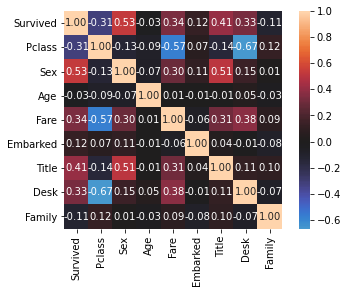

In [6]:
train_df=train_df.drop(['PassengerId','Unnamed: 0'],axis=1)
cor=train_df.corr()
# 属性间相关系数热力图
sns.heatmap(cor, 
cbar=True, annot=True, # 注入数字
                 square=True, # 单元格为正方形
                 fmt='.2f',   # 字符串格式代码
                  annot_kws={'size': 10}, # 当annot为True时，ax.text的关键字参数，即注入数字的字体大小
           center=0)

In [7]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Title,Desk,Family
0,1,0,0.0,2,0,4,3,0
1,3,0,1.0,0,0,1,1,0
2,3,1,0.0,2,0,2,1,0
3,2,0,2.0,1,0,1,1,0
4,2,0,2.0,1,0,1,1,0


1. Pipeline模型成功

In [8]:
# X = train_df.values[:,1:]
# y = train_df.values[:,0]

# pipe = Pipeline([('select', SelectKBest(k=10)),
#             ('classify',RandomForestClassifier(random_state=10,max_features='sqrt'))
#             ])
# parm_test = {'classify__n_estimators':list(range(20,50,2)),
#             'classify__max_depth':list(range(3,60,3))
#             }

# gsearch = GridSearchCV(estimator=pipe,param_grid=parm_test,scoring='roc_auc',cv = 10)
# gsearch.fit(X_train,Y_train)
# print(gsearch.best_params_,gsearch.best_score_)

In [9]:
# from sklearn.pipeline import make_pipeline
# select = SelectKBest( k = 10)
# clf = RandomForestClassifier(random_state=10,warm_start=True,
#                             n_estimators = 26,
#                             max_depth = 6,
#                             max_features = 'sqrt'
#                             )
# pipeline = make_pipeline(select,clf)
# pipeline.fit(X_train,Y_train)

# #mport pickle
# #s=pickle.dumps(pipeline)
# import joblib
# joblib.dump(pipeline, 'newpipeline.pkl')

# #clf3 = joblib.load('pipline.pkl')
# #print(clf3.predict(X[0:1]))  # 输出[0]

2. knn 能跑但是效果差

In [10]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# print(X_test)
# knn.score(X_test, Y_test)

In [11]:
# # 调参
# best_score = 0.0
# best_k = 0
# for k in range(1,10):
#     knn = KNeighborsClassifier(n_neighbors = k)
#     knn.fit(X_train, Y_train)
#     Y_pred = knn.predict(X_test)
#     score = sum(Y_pred == Y_test) / len(Y_test)
#     if score > best_score:
#         best_score = score
#         best_k = k
# print("best score is: ", best_score)
# print("best k is: ", best_k)

In [12]:
# # 获取重要性
# feat_important = knn.feature_importances_
# # 特征名
# feat_name = X_train.columns
# plt.barh(range(len(feat_name)),feat_important,tick_label=feat_name)

In [13]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# import joblib
# joblib.dump(knn, 'newknn.pkl')

3. rfc成功，调参后和pipelne结果一致

In [14]:
# # Random Forest
# # 采用默认参数进行分类
# from sklearn.metrics import classification_report

# rfc = RandomForestClassifier()
# rfc.fit(X_train,Y_train)
# pred = rfc.predict(X_test)
# #print(classification_report(pred,Y_test))


In [15]:
# rfc.get_params(deep=True)

分步调参（网格调参）

In [16]:
# # 调参
# rfc = RandomForestClassifier()
# parameters = {'n_estimators': range(50,100,10),'max_depth':range(4,13,1),
#               'min_samples_leaf':[2,3,4,5,6],'max_features':range(2,5,1)}

# grid_rfc = GridSearchCV(rfc,parameters,scoring='f1_macro')

# grid_rfc.fit(X_train,Y_train)

# grid_rfc.best_params_,grid_rfc.best_score_

In [17]:
# #rfc_param = RandomForestClassifier(n_estimators=40,max_depth=4,max_features=7,min_samples_leaf=2)
# rfc_param = RandomForestClassifier(n_estimators=40,max_depth=4,max_features=4,min_samples_leaf=3)
# rfc_param.fit(X_train,Y_train)

# pred = rfc_param.predict(X_test)
# print(classification_report(pred,Y_test))

In [18]:
RandomForest 特征重要性
# 获取重要性
feat_important = rfc_param.feature_importances_
# 特征名
feat_name = X_train.columns
plt.barh(range(len(feat_name)),feat_important,tick_label=feat_name)

In [19]:
# param_test1 = {'n_estimators':range(10,71,10)}
# gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
#                                   min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
#                        param_grid = param_test1, scoring='roc_auc',cv=5)
# gsearch1.fit(X_test,Y_test)
# gsearch1.best_params_

In [20]:
# param_test2 = {'max_depth':range(3,14,2), 'min_samples_split':range(50,201,20)}
# gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 10, 
#                                   min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
#    param_grid = param_test2, scoring='roc_auc', cv=5)
# gsearch2.fit(X_test,Y_test)
# gsearch2.best_params_

In [21]:
# param_test3 = {'min_samples_split':range(80,150,20), 'min_samples_leaf':range(10,60,10)}
# gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 10, max_depth=3,
#                                   max_features='sqrt' ,oob_score=True, random_state=10),
#    param_grid = param_test3, scoring='roc_auc', cv=5)
# gsearch3.fit(X_test,Y_test)
# #print(pd.DataFrame(gsearch3.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']] \
#  #       .sort_values(by='rank_test_score'))
# print(gsearch3.cv_results_['params'])
# print(pd.DataFrame(gsearch3.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']] \
#         .sort_values(by='rank_test_score'))

In [22]:
# param_test4 = {'max_features':range(3,11,2)}
# gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 10, max_depth=3, min_samples_split=80,
#                                   min_samples_leaf=30 ,oob_score=True, random_state=10),
#    param_grid = param_test4, scoring='roc_auc', cv=5)
# gsearch4.fit(X_test,Y_test)
# gsearch4.cv_results_, gsearch4.cv_results_, gsearch4.cv_results_
# print(gsearch4.cv_results_['params'])
# print(pd.DataFrame(gsearch4.cv_results_).loc[:, ['mean_test_score', 'rank_test_score']] \
#         .sort_values(by='rank_test_score'))

In [23]:
# rf2 = RandomForestClassifier(n_estimators= 10, max_depth=3, min_samples_split=80,
#                                   min_samples_leaf=30,max_features=3 ,oob_score=True, random_state=10)
# rf2.fit(X_test,Y_test)
# rf2.oob_score_

In [24]:
# import joblib
# joblib.dump(rfc_param, 'newrfcless.pkl')

4. 基于pytorch的简单的神经网络

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
df_train = pd.read_csv('newtrainall.csv')
df_test  = pd.read_csv('df.csv')
#df_sub   = pd.read_csv('gender_submission.csv')
df_train.head()
df_train.shape,df_test.shape

((891, 10), (418, 9))

In [27]:
#df_train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
#df_test.drop( ['Name','Ticket','Cabin'],axis=1,inplace=True)

sex      = pd.get_dummies(df_train['Sex'],drop_first=True)
embark   = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

df_train.drop(['Sex','Embarked'],axis=1,inplace=True)

sex     = pd.get_dummies(df_test['Sex'],drop_first=True)
embark  = pd.get_dummies(df_test['Embarked'],drop_first=True)
df_test = pd.concat([df_test,sex,embark],axis=1)

df_test.drop(['Sex','Embarked'],axis=1,inplace=True)

df_train.fillna(df_train.mean(),inplace=True)
df_test.fillna(df_test.mean(),inplace=True)

Scaler1 = StandardScaler()
Scaler2 = StandardScaler()

train_columns = df_train.columns
test_columns  = df_test.columns

df_train = pd.DataFrame(Scaler1.fit_transform(df_train))
df_test  = pd.DataFrame(Scaler2.fit_transform(df_test))

df_train.columns = train_columns
df_test.columns  = test_columns

features = df_train.iloc[:,2:].columns.tolist()
target   = df_train.loc[:, 'Survived'].name

X_train = df_train.iloc[:,2:].values
y_train = df_train.loc[:, 'Survived'].values

D:\anaconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
D:\anaconda\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [28]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [29]:
#thank you very much https://www.kaggle.com/mburakergenc/ttianic-minimal-pytorch-mlp
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=9, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [30]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [31]:
#thank you very much https://www.kaggle.com/mburakergenc/ttianic-minimal-pytorch-mlp

batch_size = 64
n_epochs = 500
batch_no = len(X_train) // batch_size

train_loss = 0
train_loss_min = np.Inf
for epoch in range(n_epochs):
    for i in range(batch_no):
        start = i * batch_size
        end   = start + batch_size
        x_var = Variable(torch.FloatTensor(X_train[start:end]))
        y_var = Variable(torch.LongTensor(y_train[start:end])) 
        
        optimizer.zero_grad()
        output = model(x_var)
        loss   = criterion(output,y_var)
        loss.backward()
        optimizer.step()
        
        values, labels = torch.max(output, 1)
        num_right   = np.sum(labels.data.numpy() == y_train[start:end])
        train_loss += loss.item()*batch_size
    
    train_loss = train_loss / len(X_train)
    if train_loss <= train_loss_min:
        print("Validation loss decreased ({:6f} ===> {:6f}). Saving the model...".format(train_loss_min,train_loss))
        torch.save(model.state_dict(), "model.pt")
        train_loss_min = train_loss
    
    if epoch % 200 == 0:
        print('')
        print("Epoch: {} \tTrain Loss: {} \tTrain Accuracy: {}".format(epoch+1, train_loss,num_right / len(y_train[start:end]) ))
print('Training Ended! ')

Validation loss decreased (   inf ===> 0.627003). Saving the model...

Epoch: 1 	Train Loss: 0.6270031227942402 	Train Accuracy: 0.0
Validation loss decreased (0.627003 ===> 0.575660). Saving the model...
Validation loss decreased (0.575660 ===> 0.534888). Saving the model...
Validation loss decreased (0.534888 ===> 0.508072). Saving the model...
Validation loss decreased (0.508072 ===> 0.482502). Saving the model...
Validation loss decreased (0.482502 ===> 0.463374). Saving the model...
Validation loss decreased (0.463374 ===> 0.453424). Saving the model...
Validation loss decreased (0.453424 ===> 0.446007). Saving the model...
Validation loss decreased (0.446007 ===> 0.433369). Saving the model...
Validation loss decreased (0.433369 ===> 0.424271). Saving the model...
Validation loss decreased (0.424271 ===> 0.415551). Saving the model...
Validation loss decreased (0.415551 ===> 0.412280). Saving the model...
Validation loss decreased (0.412280 ===> 0.408833). Saving the model...
Val

In [35]:
X_test     = df_test.iloc[:,1:].values
X_test_var = Variable(torch.FloatTensor(X_test), requires_grad=False) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()

In [36]:
torch.save(model,'nn.pth')

In [37]:
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': survived})
submission.to_csv('submissionnn.csv', index=False)

5. 尝试一些怪东西